# SVM
## Text analysis 
## Programming Assignment: Анализ текстов

- SVM
- TF-idf
- Grid search

In [1]:
import numpy as np
import pandas
from lib.helpersmd import write_to_file

1- Load items from the news 20 newsgroups database, related to the categories "space" and "atheism". Please note that downloading data may take several minutes .

1- Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм" . Обратите внимание, что загрузка данных может занять несколько минут

In [2]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
)

data=newsgroups.data
target=newsgroups.target

# output one sample
print type(data),type(target)
print "Corpus size : {};target shape :{}".format(len(data),target.shape)
print "Example"
print '-'*40
print data[0]
print "Class",target[0]
print '-'*40

<type 'list'> <type 'numpy.ndarray'>
Corpus size : 1786;target shape :(1786,)
Example
----------------------------------------
From: 9051467f@levels.unisa.edu.au (The Desert Brat)
Subject: Re: Keith Schneider - Stealth Poster?
Organization: Cured, discharged
Lines: 24

In article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:

> But really, are you threatened by the motto, or by the people that use it?

Every time somone writes something and says it is merely describing the norm,
it is infact re-inforcing that norm upon those programmed not to think for
themselves. The motto is dangerous in itself, it tells the world that every
*true* American is god-fearing, and puts down those who do not fear gods. It
doesn't need anyone to make it dangerous, it does a good job itself by just
existing on your currency.

> keith

The Desert Brat
-- 
John J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________
9051467f@levels.unisa.edu.au      T.S.A.K.C.    

2- Calculate TF-IDF-tags for all texts. Note that in this task we suggest that you calculate TF-IDF for all data. With this approach, it turns out that the attributes on the training set use information from the test sample - but such a situation is perfectly legal, since we do not use the values ​​of the target variable from the test. In practice, there are often situations where the characteristics of test sample objects are known at the time of training, and therefore you can use them when learning the algorithm.

2- Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.

## idf 

### The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. 
 
$idf(t,D)=log(N\div(1+|\{d\in D:t\in d\}|)) $

with

$N$ : total number of documents in the corpus $N=|D|$

$|\{d\in D:t\in d\}|$ : number of documents where the term t appears 

$ (1+|\{d\in D:t\in d\}|) $ : we adjust the dominator by adding 1 in case term t is not existed in the corpus , to avoid division by 0

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=corpus_tf_idf = vectorizer.fit_transform(data)  #sparse matrix

feature_mapping = vectorizer.get_feature_names()    #features names
idf = vectorizer.idf_    # weights of each feature

# output example
print "Number of features : {}".format(len(feature_mapping))
print "Example feautre : {} ; weight : {}".format(feature_mapping[5020],idf[5020])

Number of features : 28382
Example feautre : assure ; weight : 7.10199915404


3- Choose the minimum best parameter C from the set [10 ^ -5, 10 ^ -4, ... 10 ^ 4, 10 ^ 5] for SVM with a linear kernel (kernel = 'linear') using cross-validation of 5 blocks. Specify the random_state = 241 parameter for both SVM and KFold. As a measure of quality, use the proportion of correct answers (accuracy).


3- Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

In [4]:
from  sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import svm

grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = svm.SVC(kernel='linear', random_state=241)


#compute execution time
import time
print 'start'
start_time = time.time()
# start Grid Search
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, newsgroups.target)
# output time
print("--- %s seconds ---" % (time.time() - start_time))

start
--- 273.785838127 seconds ---


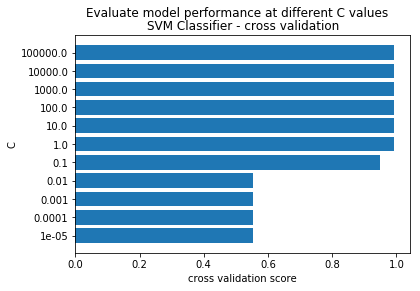

In [5]:
import matplotlib.pyplot as plt
mean_test_score=np.array(gs.cv_results_['mean_test_score'])
Cvalues=np.power(10.,np.arange(-5,6))
y_axis = np.arange(11)
plt.barh( y_axis,mean_test_score, align='center')
plt.yticks(y_axis, Cvalues)
plt.ylabel("C")
plt.xlabel("cross validation score")
plt.suptitle("Evaluate model performance at different C values")
plt.title("SVM Classifier - cross validation")
plt.show()

In [6]:
nv=len(mean_test_score)
optimalC=Cvalues[mean_test_score.argmax()]
print "Optimal value of C using Grid Search : {}".format(optimalC)

Optimal value of C using Grid Search : 1.0


4- Train SVM throughout the sample with the optimal parameter C found in the previous step.

4- Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

In [7]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=optimalC, random_state=241)
clf.fit(X,target)
clf.coef_.shape

(1, 28382)

5- Find 10 words with the largest absolute weight value (weights are stored in the coef_ field of svm.SVC). They are the answer to this task. Specify these words separated by commas or spaces, in lower case, in lexicographical order.

5- Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, в лексикографическом порядке.

In [8]:
coef=clf.coef_
data=coef.data
indices=coef.indices
combined=dict(zip(indices,abs(data)))
sortedRes = sorted(combined.items(), key=lambda kv: kv[1], reverse=True)[:10]
words=sorted([feature_mapping[tup[0]] for tup in sortedRes])
ans=" ".join(words)
write_to_file(ans,"week%d-A%dT%d.out"%(3,2,1))